## *Team 14 Final Project Report*

Members: Jared Maynard-Weicherding, Rijul Newalkar, Mario Villatoro Amaya, Kyungho Lim

Class: INST447, Section: 0101

#### *Project Proposal Submission Information*

- What is the specific project goal that you are going to focus on and why is it important?
    - We are writing about parking tickets and violations and we are going to look at places in DC where these are most prevalent. This is important because we can potentially find places where violations are much more enforced which could make it easier for users to avoid tickets.
- Where will you get the data?
    - We got our parking enforcement and abandoned vehicles data from opendata.dc.gov
    - Parking Enforcement:
        - https://opendata.dc.gov/datasets/DCGIS::parking-enforcement-in-the-last-30-days/explore?location=38.894734%2C-77.019147%2C13.00&showTable=true
    - Abandoned Vehicles:
        - https://opendata.dc.gov/datasets/abandoned-vehicle-in-last-30-days/explore?location=38.894712%2C-77.019147%2C12.90&showTable=true
    - The parking enforcement data and the abandoned vehicles data includes: servicecode, servicecodedescription, servicetypecoddescription, organizationacronym, servicecallcount, adddate, resolutiondate, serviceduedata, serviceorderdate, inspectiondate, serviceorderstatus, servicerequestID, priority, streetaddress, xcoord, ycoord, latitude, longitude, city, state, zipcode, maraddressrepositoryID, ward, created, edited
    - To address and solve the problem, we will use the following sections: servicecode, servicecodedescription, serviceorderdata, streetaddress, xcoord, ycoord, city, state, zipcode
- What data processing steps will you need to undergo to extract results? Be as detailed as possible.
    - Since the data seems to be somewhat cleaned already, we can see if we can further clean it.
        - Example 1: the time and date is together for the adddate and resolutiondate, and serviceduedate where we can separate the actual date and time.
        - Example 2: Changing the variables to camelcase so it's a little bit more legible when reading our code.
        - Example 3: Removing columns that might not be necessary, like the column for what organization is the one putting this information in.
            - All inputs are from the Department of Public Works (DC DPW), so it is redundant unless there are other organizations contributing to this data.
    - Since there are both GeoJSON files for both datasets, we were thinking of using those as well if it serves us.
    - There are also API for these datasets but we are not sure on how to exactly use them at the time being.
        - Possibly using Postman with these APIs provided.


#### *Feedback from Professor Heidenblad for Project Proposal*

April 23rd, 2023 - "This project should end up with some interesting results. Working with the GeoJSON would definitely be an opportunity to increase the complexity. The opendata API may be worth exploring, but it would depend on what you want to do with it."

### *Details for Final Project Report*

Your final project report should take the form of a report which describes the data, the goal of your project, your analytic steps, your findings, limitations, and take away message. As a guideline, I suggest including the following sections, although choose the sections that make most sense for your project.

- Introduction (several paragraphs)
    - Explains data (source, variables, collection method, etc), goal, and motivation for goal.
- Method (length will depend on your project)
    - Explains in detail the cleaning, preprocessing steps, and analytic steps you took.
        - Should be detailed enough that someone else could replicate your work.
- Preprocessing (length will depend on your project)
    - Cleans and manipulates data into the right format for analysis.
- Results (length will depend on your project)
    - Summarizes and visualizes the data as appropriate to address your goal.
        - May be broken down into subsections if that makes sense.
- Discussion (several paragraphs)
    - What are the implications of your findings with respect to your goal?
- Limitations (a couple of paragraphs)
    - What are the limitations of the data set and your analyses?
- Conclusion (a couple sentences)
    - What is the final take away from your work?

Your report should be created using Jupyter Notebook and should include processing steps as code sections. You should turn in the html file(s), the source code (ipynb), raw data, and clean data. If your analysis required lots of cleaning or preprocessing, you can include the code to perform these actions in a separate Jupyter Notebook (or other code files). However, you should turn in all code.

Link to GitHub repository: https://github.com/MarioVA1/INST447FinalProject

## *Introduction*

*Several Paragraphs*
    - *Explains data (source, variables, collection method, etc), goal, and motivation for goal.*

For our final project for INST447, we decided to look at parking violations in the various wards (8 total) of Washington, DC. We have all either gotten tickets or know people that have gotten tickets in DC. Our goal is to look at locations where these violations are most prevalent in a hope to find places that are more heavily policed, and where parking violations are more enforced. Findings could help us understand how different areas of DC are patrolled and could help us understand if there is over policing present. Our findings could also help citizens of DC to avoid these areas or be more mindful of where they are parking. We also have a file that has data from abandoned vehicles. We wanted to use this in order to look for a correlation between locations with parking violations and abandoned vehicles.

We decided as a group that the best way to collaborate on a project like this was to create a GitHub repository for the project. The link is supplied in the JSON file. We found our data from the OpenData DC website (opendata.dc.gov). This data is provided by the government, and is open to all of the public. The data we used from their website was pivotal to our success because the files are reliable, accurate, and similar to one another. We downloaded them as csv files directly from the DC government’s website and read the csv files into appropriate DataFrames, abandoned_df and parking_df. They also are very robust in the amount of data that they contain and we felt we could use the data offered on their website to help reach our goal.

The two csv files we downloaded were read into appropriately named DataFrames, abandoned_df and parking_df. Our data about abandoned vehicles and service requests are stored in abandoned_df and our data about parking violations/tickets are stored in parking_df. Both sets of data have similar columns: servicecode, servicecodedescription, servicetypecoddescription, organizationacronym, servicecallcount, adddate, resolutiondate, serviceduedata, serviceorderdate, inspectiondate, serviceorderstatus, servicerequestID, priority, streetaddress, xcoord, ycoord, latitude, longitude, city, state, zipcode, maraddressrepositoryID, ward, created, edited.

A lot of these columns are redundant and can be dropped, with us planning to retain only the following columns for analysis: servicecode (string value of service code), servicecodedescription (string value describing the service code), adddate (string value of the add date), resolutiondate (string value of the end date), serviceduedate (string value of the due date for service), serviceorderdate (string value of the end date for service), priority (string value for importance), streetaddress (string value for the street address), zipcode (numerical value for the zipcode), ward (numerical value for the ward).


In [151]:
# Installing libraries for working with data

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gpd # module required to use geoJSON 
import geodatasets
import folium 
import mapclassify

## *Method*

*Length Will Depend on Project*
    - *Explains in detail the cleaning, preprocessing steps, and analytic steps you took. Should be detailed enough someone else could replicate your work.*

To start we imported the many libraries we used for the project, including new libraries for using GeoJSON (geopandas, geodatasets, folium, mapclassify). To figure out which columns we would drop and keep, we used a function to show all columns in any DataFrames called after the setting. Setting pd.set_option() with the arguments for ‘display.max_columns’ and None, shows every column instead of shortening the DataFrame when called. After reading in the two csv files and creating DataFrames from them, we had to clean the data. We started doing this by dropping unnecessary columns. Once all the remaining columns were relevant to our analysis we proceeded to rename the columns to make them more codable. Next, we dropped all the null values and converted string values from the ward column into numerical, this allowed us to use them for analysis. Then we used a map to change the values of the priority column to their numerical equivalents. We were now ready to conduct our analysis.

To start our analysis, we were curious how many abandoned vehicle service calls and parking violations were issued per ward. To do this, we grouped the ward data from both DataFrames and counted the occurrences using .size() and sorting the values in descending order while calling .head(8) at the end of the line because there are only 8 wards. We decided after this to try to visualize some data to see if it could help us reach our goals. The first visualization we did was save the results from the previous step into appropriate variables. We then used those variables, one for each DataFrame, and plotted the violations per ward, while trying to see if priority of calls change based on which ward they occur in. We felt a stacked bar graph would be the best visual for this data.

After this step and evaluating the two visuals, we were curious if there were repeat offenders for abandoned vehicle service calls. To find this we wrote similar code to the step made to create the variables for the previous visualizations, but grouped by street address. We then repeated this process for parking_df to see which addresses ticketed the most in the 30 days of collected data. Using some of the variables and manipulation from before, we decided a good approach would be to create a bar graph of the top 15 addresses from parking_df with violations and stack the graph based on the two types of parking violations (out-of-state and typical violation).

For more of a challenge and trying to see if other patterns stand out in the data we decided to see if specific days or times of the week lead to an increase in service calls about abandoned vehicles. We dropped even more columns from abandoned_df and saved the relevant data in abandoned_small_df. To start, we split the string value for the data of the add_date column and saved the appropriate value to a new column called add_date_time, while dropping the original column. Then we can use built-in functions to convert the string value in add_date_time to a DateTime format and drop the time value to only keep the date. After creating the new column start_date, we could then drop the old column add_date_time. To finish manipulating the data for a neater visualization, we grouped the start_date and ward by size and saved the series to a variable named se. Then to make it easier, we converted the series back to a DataFrame and reset the index for the visualization. To finish before moving on to GeoJSON, we created a line plot using subplots and seaborn to see the number of service calls per ward for each day in the data.

After creating the previous graphs and evaluating them, we created a number of visualizations using GeoJSON. Reading in the files for GeoJSON is similar to reading in a csv file to a DataFrame. Because of the similarity of the libraries and data cleaning, we were able to use the same type of cleaning we used previously for the new type of analysis. The first visualization we created was a plot of abandoned vehicles plotted by their wards. This allowed us to look for clusters according to wards, which would help us answer if certain wards had more cars abandoned. We also created an interactive map surrounding the abandoned vehicle service calls data, with an effective map layout, which you could scroll and zoom through. This helped us visualize the data points with the map of DC supporting it. We were able to notice clustering easier and put it into more of a perspective. Our next visualization was a plot of parking violations by ward. This allowed us to look for clustering with parking violations in relation to ward and try to see any relation between the two sets of data. We planned on also creating a similar interactive map which allows us to scroll and zoom through all the plotted parking violations, but due to processing power and the larger size of parking_df compared to abandoned_df, we had to comment that section out to save our computers. We found the fact that both the GeoJSON scatter plots, without the interactive function, looked like the shape of DC to be extremely pleasing.


## *Preprocessing*

*Length Will Depend on Project*
    - *Cleans and manipulates data into the right format for analysis.*

Please follow along with the code and the complimentary comments in blocks and the markdown comments.

## *Results*

*Length Will Depend on Project*
    - *Summarizes and visualizes the data as appropriate to address your goal. May be broken down into subsections if that makes sense.*

Please follow along with the code and the complimentary comment in blocks and the markdown comments. The results can be seen throughout our visuals and the GeoJSON section. We also describe and evaluate what we see in the visuals.

In [152]:
# Currently all columns are not displayed while calling .head() on the two DataFrames. This will allow us to see all columns.

pd.set_option('display.max_columns', None)

In [153]:
abandoned_df = pd.read_csv('Abandoned_Vehicle_in_Last_30_Days.csv')
abandoned_df.head()

,X,Y,OBJECTID,SERVICECODE,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,SERVICECALLCOUNT,ADDDATE,RESOLUTIONDATE,SERVICEDUEDATE,SERVICEORDERDATE,INSPECTIONFLAG,INSPECTIONDATE,INSPECTORNAME,SERVICEORDERSTATUS,STATUS_CODE,SERVICEREQUESTID,PRIORITY,STREETADDRESS,XCOORD,YCOORD,LATITUDE,LONGITUDE,CITY,STATE,ZIPCODE,MARADDRESSREPOSITORYID,WARD,DETAILS,GIS_ID,GLOBALID,CREATOR,CREATED,EDITOR,EDITED
0,-77.030899,38.911135,10724521,S0000,Abandoned Vehicle - On Public Property,PEMA- Parking Enforcement Management Administr...,DPW,1,2023/03/15 15:09:40+00,2023/03/22 15:39:05+00,2023/04/03 15:09:40+00,2023/03/15 15:09:40+00,NaN,NaN,NaN,Closed,NaN,23-00124770,Standard,Q STREET NW AND KINGMAN PLACE NW,397320.359995,138140.937004,38.911127,-77.030896,WASHINGTON,DC,20009,900493,2,NaN,NaN,{F6F2D87E-391F-7F8A-E053-782F520AED12},NaN,NaN,NaN,NaN
1,-76.985941,38.901218,10724551,S0000,Abandoned Vehicle - On Public Property,PEMA- Parking Enforcement Management Administr...,DPW,1,2023/03/15 15:58:39+00,2023/04/07 19:15:12+00,2023/04/03 15:58:39+00,2023/03/15 15:58:39+00,NaN,NaN,NaN,Closed,NaN,23-00124938,Standard,1102 STAPLES STREET NE,401219.710000,137039.740000,38.901211,-76.985939,WASHINGTON,DC,20002,74435,5,NaN,NaN,{F6F3796F-ECB0-1362-E053-782F520A4D54},NaN,NaN,NaN,NaN
2,-76.993940,38.894953,10724558,S0000,Abandoned Vehicle - On Public Property,PEMA- Parking Enforcement Management Administr...,DPW,1,2023/03/15 16:18:07+00,2023/04/12 12:17:47+00,2023/04/03 16:18:07+00,2023/03/15 16:18:07+00,NaN,NaN,NaN,Closed,NaN,23-00125009,Standard,400 9TH STREET NE,400525.880000,136344.250000,38.894946,-76.993938,WASHINGTON,DC,20002,28540,6,NaN,NaN,{F6F3E4BB-06F1-4F2C-E053-782F520A8327},NaN,NaN,NaN,NaN
3,-76.988453,38.862826,10724585,S0000,Abandoned Vehicle - On Public Property,PEMA- Parking Enforcement Management Administr...,DPW,1,2023/03/15 17:31:13+00,2023/03/21 16:42:06+00,2023/04/03 17:31:13+00,2023/03/15 17:31:13+00,NaN,NaN,NaN,Closed,NaN,23-00125262,Standard,2326 PAYNE TERRACE SE,401002.340000,132777.930000,38.862819,-76.988451,WASHINGTON,DC,20020,48364,8,NaN,NaN,{F6F4F0F4-5CAD-3E5A-E053-782F520AC3E2},NaN,NaN,NaN,NaN
4,-77.000839,38.915190,10724657,S0000,Abandoned Vehicle - On Public Property,PEMA- Parking Enforcement Management Administr...,DPW,1,2023/03/15 18:21:48+00,NaN,2023/04/03 18:21:48+00,2023/03/15 18:21:48+00,NaN,NaN,NaN,Open,NaN,23-00125431,Standard,1876 4TH STREET NE,399927.440000,138590.680000,38.915183,-77.000837,WASHINGTON,DC,20002,156294,5,NaN,NaN,{F6F591E2-4463-497B-E053-782F520AA85A},NaN,NaN,NaN,NaN


In [154]:
parking_df = pd.read_csv('Parking_Enforcement_in_the_Last_30_Days.csv')
parking_df.head()

,X,Y,OBJECTID,SERVICECODE,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,SERVICECALLCOUNT,ADDDATE,RESOLUTIONDATE,SERVICEDUEDATE,SERVICEORDERDATE,INSPECTIONFLAG,INSPECTIONDATE,INSPECTORNAME,SERVICEORDERSTATUS,STATUS_CODE,SERVICEREQUESTID,PRIORITY,STREETADDRESS,XCOORD,YCOORD,LATITUDE,LONGITUDE,CITY,STATE,ZIPCODE,MARADDRESSREPOSITORYID,WARD,DETAILS,GIS_ID,GLOBALID,CREATOR,CREATED,EDITOR,EDITED
0,-77.023454,38.981850,10724421,S0336,Out of State Parking Violation (ROSA),PEMA- Parking Enforcement Management Administr...,DPW,1,2023/03/15 04:34:29+00,2023/03/15 07:46:56+00,2023/04/26 04:34:29+00,2023/03/15 04:34:29+00,NaN,NaN,NaN,Closed,NaN,23-00124003,Standard,7500 EASTERN AVENUE NW,397968.08,145990.78,38.981843,-77.023451,WASHINGTON,DC,20012.0,251131,4,NaN,NaN,{F6EA0B7F-2B37-77F1-E053-782F520A3108},NaN,NaN,NaN,NaN
1,-77.024935,38.921084,10724422,S0261,Parking Enforcement,PEMA- Parking Enforcement Management Administr...,DPW,1,2023/03/15 04:39:45+00,2023/03/15 08:37:17+00,2023/03/16 04:39:45+00,2023/03/15 04:39:45+00,NaN,NaN,NaN,Closed,NaN,23-00124004,Standard,2323 SHERMAN AVENUE NW,397837.85,139245.25,38.921076,-77.024933,WASHINGTON,DC,20001.0,232313,1,NaN,NaN,{F6EA0B7F-2B38-77F1-E053-782F520A3108},NaN,NaN,NaN,NaN
2,-76.980522,38.889022,10724423,S0336,Out of State Parking Violation (ROSA),PEMA- Parking Enforcement Management Administr...,DPW,1,2023/03/15 05:03:54+00,2023/03/15 07:10:37+00,2023/04/27 05:03:54+00,2023/03/15 05:03:54+00,NaN,NaN,NaN,Closed,NaN,23-00124007,Standard,30 17TH STREET SE,401690.03,135685.93,38.889014,-76.980520,WASHINGTON,DC,20003.0,155403,7,NaN,NaN,{F6EA76D6-0841-1BC3-E053-782F520A3E86},NaN,NaN,NaN,NaN
3,-76.980979,38.902732,10724429,S0261,Parking Enforcement,PEMA- Parking Enforcement Management Administr...,DPW,1,2023/03/15 10:59:06+00,2023/03/15 16:04:07+00,2023/03/16 10:59:06+00,2023/03/15 10:59:06+00,NaN,NaN,NaN,Closed,NaN,23-00124040,Standard,1606 K STREET NE,401650.12,137207.91,38.902725,-76.980976,WASHINGTON,DC,20002.0,60120,5,NaN,NaN,{F6EF7E33-55EB-7477-E053-782F520AA985},NaN,NaN,NaN,NaN
4,-76.943975,38.867518,10724431,S0261,Parking Enforcement,PEMA- Parking Enforcement Management Administr...,DPW,1,2023/03/15 11:07:59+00,2023/03/15 12:55:44+00,2023/03/16 11:07:59+00,2023/03/15 11:07:59+00,NaN,NaN,NaN,Closed,NaN,23-00124043,Standard,1531 41ST STREET SE,404862.21,133300.13,38.867510,-76.943973,WASHINGTON,DC,20020.0,61047,7,NaN,NaN,{F6EF7E33-55ED-7477-E053-782F520AA985},NaN,NaN,NaN,NaN


In [155]:
abandoned_df.shape

(772, 36)

In [156]:
parking_df.shape

(6693, 36)

Both abandoned_df and parking_df have 36 columns, while abandoned_df has 772 rows and parking_df has 6693 rows. We will now remove columns we do not need to answer our researh question and goals. The only columns we have decided to keep for now is SERVICECODE, SERVICECODEDESCRIPTION, ADDDATE, RESOLUTIONDATE, SERVICEDUEDATE, SERVICEORDERDATE, PRIORITY, STREETADDRESS, ZIPCODE, WARD.

In [157]:
abandoned_df = abandoned_df[['SERVICECODE', 'SERVICECODEDESCRIPTION', 'ADDDATE', 'RESOLUTIONDATE',
                             'SERVICEDUEDATE', 'SERVICEORDERDATE', 'PRIORITY', 'STREETADDRESS', 'ZIPCODE', 'WARD']]
abandoned_df.head()

,SERVICECODE,SERVICECODEDESCRIPTION,ADDDATE,RESOLUTIONDATE,SERVICEDUEDATE,SERVICEORDERDATE,PRIORITY,STREETADDRESS,ZIPCODE,WARD
0,S0000,Abandoned Vehicle - On Public Property,2023/03/15 15:09:40+00,2023/03/22 15:39:05+00,2023/04/03 15:09:40+00,2023/03/15 15:09:40+00,Standard,Q STREET NW AND KINGMAN PLACE NW,20009,2
1,S0000,Abandoned Vehicle - On Public Property,2023/03/15 15:58:39+00,2023/04/07 19:15:12+00,2023/04/03 15:58:39+00,2023/03/15 15:58:39+00,Standard,1102 STAPLES STREET NE,20002,5
2,S0000,Abandoned Vehicle - On Public Property,2023/03/15 16:18:07+00,2023/04/12 12:17:47+00,2023/04/03 16:18:07+00,2023/03/15 16:18:07+00,Standard,400 9TH STREET NE,20002,6
3,S0000,Abandoned Vehicle - On Public Property,2023/03/15 17:31:13+00,2023/03/21 16:42:06+00,2023/04/03 17:31:13+00,2023/03/15 17:31:13+00,Standard,2326 PAYNE TERRACE SE,20020,8
4,S0000,Abandoned Vehicle - On Public Property,2023/03/15 18:21:48+00,NaN,2023/04/03 18:21:48+00,2023/03/15 18:21:48+00,Standard,1876 4TH STREET NE,20002,5


In [158]:
parking_df = parking_df[['SERVICECODE', 'SERVICECODEDESCRIPTION', 'ADDDATE', 'RESOLUTIONDATE',
                             'SERVICEDUEDATE', 'SERVICEORDERDATE', 'PRIORITY', 'STREETADDRESS', 'ZIPCODE', 'WARD']]
parking_df.head()

,SERVICECODE,SERVICECODEDESCRIPTION,ADDDATE,RESOLUTIONDATE,SERVICEDUEDATE,SERVICEORDERDATE,PRIORITY,STREETADDRESS,ZIPCODE,WARD
0,S0336,Out of State Parking Violation (ROSA),2023/03/15 04:34:29+00,2023/03/15 07:46:56+00,2023/04/26 04:34:29+00,2023/03/15 04:34:29+00,Standard,7500 EASTERN AVENUE NW,20012.0,4
1,S0261,Parking Enforcement,2023/03/15 04:39:45+00,2023/03/15 08:37:17+00,2023/03/16 04:39:45+00,2023/03/15 04:39:45+00,Standard,2323 SHERMAN AVENUE NW,20001.0,1
2,S0336,Out of State Parking Violation (ROSA),2023/03/15 05:03:54+00,2023/03/15 07:10:37+00,2023/04/27 05:03:54+00,2023/03/15 05:03:54+00,Standard,30 17TH STREET SE,20003.0,7
3,S0261,Parking Enforcement,2023/03/15 10:59:06+00,2023/03/15 16:04:07+00,2023/03/16 10:59:06+00,2023/03/15 10:59:06+00,Standard,1606 K STREET NE,20002.0,5
4,S0261,Parking Enforcement,2023/03/15 11:07:59+00,2023/03/15 12:55:44+00,2023/03/16 11:07:59+00,2023/03/15 11:07:59+00,Standard,1531 41ST STREET SE,20020.0,7


Renaming the columns to be more coherent and codable will help. The following code will rename the columns to a more conventional format. We will create a dictionary to hold the changes and then use rename() on the DataFrame to change the column names.

In [159]:
dict_change_col = {'SERVICECODE' : 'service_code', 'SERVICECODEDESCRIPTION' : 'service_code_desc', 'ADDDATE' : 'add_date', 'RESOLUTIONDATE' : 'resolution_date',
                   'SERVICEDUEDATE' : 'service_due_date', 'SERVICEORDERDATE' : 'service_order_date', 'PRIORITY' : 'priority', 'STREETADDRESS' : 'street_address',
                   'ZIPCODE' : 'zipcode', 'WARD' : 'ward'}
abandoned_df = abandoned_df.rename(columns = dict_change_col)
abandoned_df.head()

,service_code,service_code_desc,add_date,resolution_date,service_due_date,service_order_date,priority,street_address,zipcode,ward
0,S0000,Abandoned Vehicle - On Public Property,2023/03/15 15:09:40+00,2023/03/22 15:39:05+00,2023/04/03 15:09:40+00,2023/03/15 15:09:40+00,Standard,Q STREET NW AND KINGMAN PLACE NW,20009,2
1,S0000,Abandoned Vehicle - On Public Property,2023/03/15 15:58:39+00,2023/04/07 19:15:12+00,2023/04/03 15:58:39+00,2023/03/15 15:58:39+00,Standard,1102 STAPLES STREET NE,20002,5
2,S0000,Abandoned Vehicle - On Public Property,2023/03/15 16:18:07+00,2023/04/12 12:17:47+00,2023/04/03 16:18:07+00,2023/03/15 16:18:07+00,Standard,400 9TH STREET NE,20002,6
3,S0000,Abandoned Vehicle - On Public Property,2023/03/15 17:31:13+00,2023/03/21 16:42:06+00,2023/04/03 17:31:13+00,2023/03/15 17:31:13+00,Standard,2326 PAYNE TERRACE SE,20020,8
4,S0000,Abandoned Vehicle - On Public Property,2023/03/15 18:21:48+00,NaN,2023/04/03 18:21:48+00,2023/03/15 18:21:48+00,Standard,1876 4TH STREET NE,20002,5


In [160]:
parking_df = parking_df.rename(columns = dict_change_col)
parking_df.head()

,service_code,service_code_desc,add_date,resolution_date,service_due_date,service_order_date,priority,street_address,zipcode,ward
0,S0336,Out of State Parking Violation (ROSA),2023/03/15 04:34:29+00,2023/03/15 07:46:56+00,2023/04/26 04:34:29+00,2023/03/15 04:34:29+00,Standard,7500 EASTERN AVENUE NW,20012.0,4
1,S0261,Parking Enforcement,2023/03/15 04:39:45+00,2023/03/15 08:37:17+00,2023/03/16 04:39:45+00,2023/03/15 04:39:45+00,Standard,2323 SHERMAN AVENUE NW,20001.0,1
2,S0336,Out of State Parking Violation (ROSA),2023/03/15 05:03:54+00,2023/03/15 07:10:37+00,2023/04/27 05:03:54+00,2023/03/15 05:03:54+00,Standard,30 17TH STREET SE,20003.0,7
3,S0261,Parking Enforcement,2023/03/15 10:59:06+00,2023/03/15 16:04:07+00,2023/03/16 10:59:06+00,2023/03/15 10:59:06+00,Standard,1606 K STREET NE,20002.0,5
4,S0261,Parking Enforcement,2023/03/15 11:07:59+00,2023/03/15 12:55:44+00,2023/03/16 11:07:59+00,2023/03/15 11:07:59+00,Standard,1531 41ST STREET SE,20020.0,7


Checking the information of the two DataFrames to make the dTypes appropriate for manipulation. Will change the dTypes if needed.

In [161]:
abandoned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   service_code        772 non-null    object
 1   service_code_desc   772 non-null    object
 2   add_date            772 non-null    object
 3   resolution_date     570 non-null    object
 4   service_due_date    772 non-null    object
 5   service_order_date  772 non-null    object
 6   priority            772 non-null    object
 7   street_address      772 non-null    object
 8   zipcode             772 non-null    int64 
 9   ward                772 non-null    object
dtypes: int64(1), object(9)
memory usage: 60.4+ KB


In [162]:
parking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6693 entries, 0 to 6692
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   service_code        6693 non-null   object 
 1   service_code_desc   6693 non-null   object 
 2   add_date            6693 non-null   object 
 3   resolution_date     6643 non-null   object 
 4   service_due_date    6693 non-null   object 
 5   service_order_date  6693 non-null   object 
 6   priority            6693 non-null   object 
 7   street_address      6693 non-null   object 
 8   zipcode             6692 non-null   float64
 9   ward                6693 non-null   object 
dtypes: float64(1), object(9)
memory usage: 523.0+ KB


Need to drop null values to allow for further manipulation and analysis.

In [163]:
abandoned_df = abandoned_df.dropna()
parking_df = parking_df.dropna()

Dropping the string values of 'Null' from ward column to allow for conversion from object to int64. Converting dTypes to more appropriate typing.

In [164]:
abandoned_df = abandoned_df[abandoned_df.ward != 'Null']
parking_df = parking_df[parking_df.ward != 'Null']

In [165]:
abandoned_df['ward'] = abandoned_df['ward'].astype('int64')
parking_df = parking_df.astype({'zipcode' : 'int64', 'ward' : 'int64'})

Using a map to change the values for priority column in both DataFrames to a numerical equivalent.

In [166]:
num_map = {'Standard' : 1, 'High': 2, 'Urgent' : 3}

abandoned_df = abandoned_df.replace({'priority' : num_map})
parking_df = parking_df.replace({'priority' : num_map})

In [167]:
# Calling head on abandoned_df to evaluate changes and check for more cleaning that might be needed.

abandoned_df.head()

,service_code,service_code_desc,add_date,resolution_date,service_due_date,service_order_date,priority,street_address,zipcode,ward
0,S0000,Abandoned Vehicle - On Public Property,2023/03/15 15:09:40+00,2023/03/22 15:39:05+00,2023/04/03 15:09:40+00,2023/03/15 15:09:40+00,1,Q STREET NW AND KINGMAN PLACE NW,20009,2
1,S0000,Abandoned Vehicle - On Public Property,2023/03/15 15:58:39+00,2023/04/07 19:15:12+00,2023/04/03 15:58:39+00,2023/03/15 15:58:39+00,1,1102 STAPLES STREET NE,20002,5
2,S0000,Abandoned Vehicle - On Public Property,2023/03/15 16:18:07+00,2023/04/12 12:17:47+00,2023/04/03 16:18:07+00,2023/03/15 16:18:07+00,1,400 9TH STREET NE,20002,6
3,S0000,Abandoned Vehicle - On Public Property,2023/03/15 17:31:13+00,2023/03/21 16:42:06+00,2023/04/03 17:31:13+00,2023/03/15 17:31:13+00,1,2326 PAYNE TERRACE SE,20020,8
5,S0000,Abandoned Vehicle - On Public Property,2023/03/15 12:48:59+00,2023/03/31 15:39:05+00,2023/04/03 12:48:59+00,2023/03/15 12:48:59+00,1,5216 JUST STREET NE,20019,7


In [168]:
# Calling head on parking_df to evaluate changes and check for more cleaning that might be needed.

parking_df.head()

,service_code,service_code_desc,add_date,resolution_date,service_due_date,service_order_date,priority,street_address,zipcode,ward
0,S0336,Out of State Parking Violation (ROSA),2023/03/15 04:34:29+00,2023/03/15 07:46:56+00,2023/04/26 04:34:29+00,2023/03/15 04:34:29+00,1,7500 EASTERN AVENUE NW,20012,4
1,S0261,Parking Enforcement,2023/03/15 04:39:45+00,2023/03/15 08:37:17+00,2023/03/16 04:39:45+00,2023/03/15 04:39:45+00,1,2323 SHERMAN AVENUE NW,20001,1
2,S0336,Out of State Parking Violation (ROSA),2023/03/15 05:03:54+00,2023/03/15 07:10:37+00,2023/04/27 05:03:54+00,2023/03/15 05:03:54+00,1,30 17TH STREET SE,20003,7
3,S0261,Parking Enforcement,2023/03/15 10:59:06+00,2023/03/15 16:04:07+00,2023/03/16 10:59:06+00,2023/03/15 10:59:06+00,1,1606 K STREET NE,20002,5
4,S0261,Parking Enforcement,2023/03/15 11:07:59+00,2023/03/15 12:55:44+00,2023/03/16 11:07:59+00,2023/03/15 11:07:59+00,1,1531 41ST STREET SE,20020,7


The two lines of code below counts and sorts the abandoned vehicles service calls and the parking violations for the different DC wards.

In [169]:
abandoned_df.groupby('ward').size().sort_values(ascending = False).head(8)

ward
7    129
8    105
5     94
4     78
6     69
1     38
2     32
3     22
dtype: int64

In [170]:
parking_df.groupby('ward').size().sort_values(ascending = False).head(8)

ward
6    1189
1    1179
5    1168
2     848
7     681
8     614
4     605
3     321
dtype: int64

Even though ward 5 has the third most service calls regarding abandoned vehicles and the third most parking violations and ward 3 has the lowest for each, there is no real pattern between wards and the two data from the two DataFrames. Wards 7 and 8 have the most abandoned vehicle service calls but are 5th and 6th for parking violations.

The code segments below create a visualization counting the number of service calls based on priority value. We were wondering if higher priority calls are more likely to occur in some wards compared to other wards. We also noticed that a zipcode can be part of multiple different wards, which could distort the findings but due to time constraints we will just focus on evaluating the ward data.

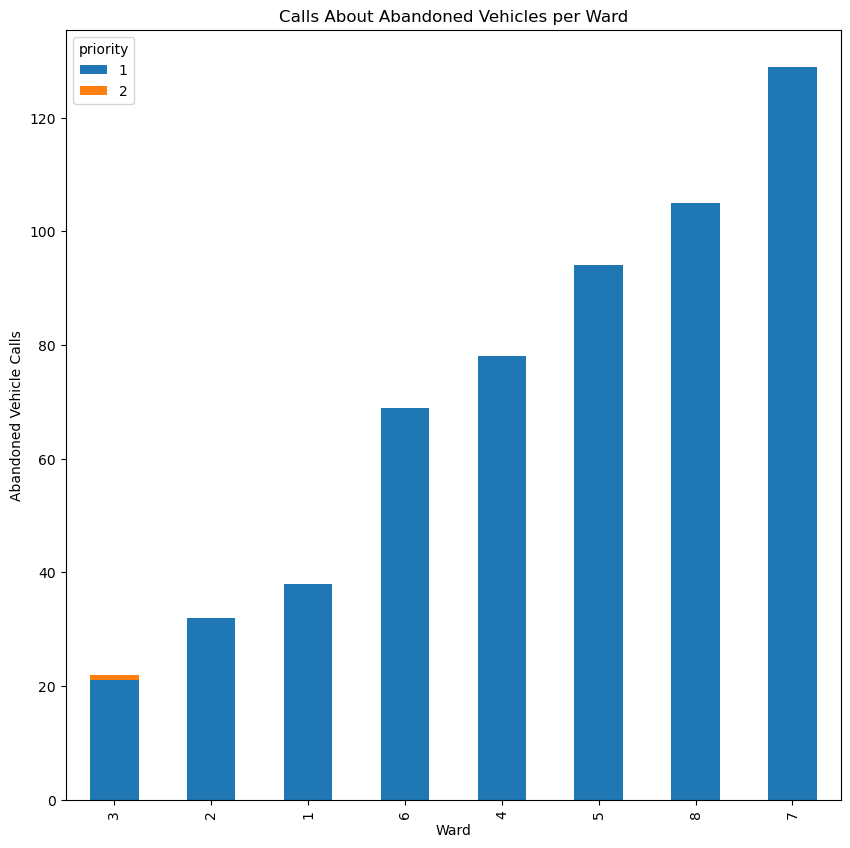

In [171]:
sort_order = abandoned_df.groupby(['ward']).size().sort_values(ascending = True).index.to_list()
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
abandoned_df.groupby(['ward', 'priority']).size().unstack().reindex(sort_order).plot.bar(ax = ax, xlabel = 'Ward',  ylabel = 'Abandoned Vehicle Calls', title = 'Calls About Abandoned Vehicles per Ward', stacked = True)
plt.show()

For abandoned_df, there is a higher priority for abandoned vehicles in ward 3, even though the total number of service calls for abandoned vehicles in ward 3 is the smallest.

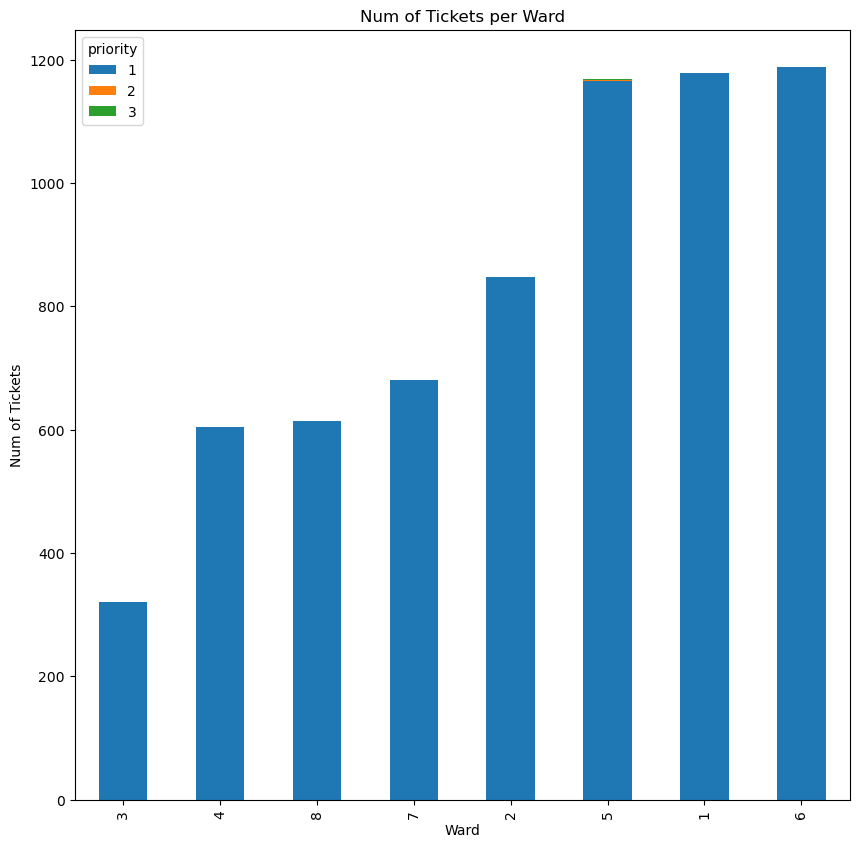

In [172]:
sort_order = parking_df.groupby(['ward']).size().sort_values(ascending = True).index.to_list()
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
parking_df.groupby(['ward', 'priority']).size().unstack().reindex(sort_order).plot.bar(ax = ax, xlabel = 'Ward', ylabel = 'Num of Tickets', title = 'Num of Tickets per Ward', stacked = True)
plt.show()

Compared to the bar chart created comparing amounts of service calls per ward for abandoned vehicles, there are a couple similarities with service calls per ward for parking violations. Once again, ward 3 has the least amount of service calls, but ward 1, 5 and 6 in parking violations are the highest, while ward 7 and 8 are highest for abandoned vehicles.

In [173]:
# Seeing if there are repeat offenders for abandoned vehicles.

abandoned_df.groupby('street_address').size().sort_values(ascending = False).head()

street_address
4423 GAULT PLACE NE                    6
1251 OAK DRIVE SE                      5
3565 6TH STREET NW                     4
36TH STREET SE AND CROFFUT PLACE SE    4
501 6TH STREET SW                      4
dtype: int64

In [174]:
# Seeing what street addresses are the most ticketed.

parking_df.groupby('street_address').size().sort_values(ascending = False).head()

street_address
1401 NEW YORK AVENUE NE    48
533 NEWTON PLACE NW        34
1100 4TH STREET SW         30
3750 JAMISON STREET NE     25
417 17TH STREET NE         23
dtype: int64

There are many repeat offenders for abandoned vehicle service calls. 4423 Gault Place NE has the most service requests with 6. Many other addresses have more than one service call for abandoned vehicles.

We also wanted to see which locations in DC are the most ticketed for parking violations and were surprised with what we found. 1401 New York Avenue NE has the most tickets in 30 days, with 48 total tickets (amounts to 1.6 tickets a day). Other locations have lots of ticketing occurring throughout a month, with 533 Newton Place NW and 1100 4th Street SW being 34 tickets and 30 tickets respectively.

<AxesSubplot: xlabel='Street Address', ylabel='Num of Tickets'>

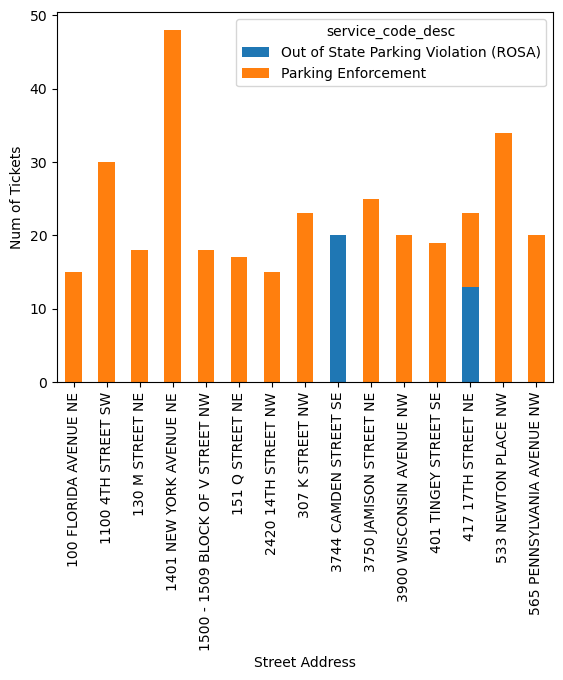

In [175]:
# Visualizing the type of ticket violation for the top 15 ticketed locations in DC.

top_tickets = parking_df.groupby('street_address').size().sort_values(ascending = False).head(15).index.to_list()

top_tix_df = parking_df.loc[parking_df['street_address'].isin(top_tickets)]
top_tix_df.groupby(['street_address', 'service_code_desc']).size().unstack().plot(kind = 'bar', xlabel = 'Street Address', ylabel = 'Num of Tickets', stacked = True)

We found the visualization above to be very interesting and it raised a couple questions we do not have the capacity to answer with the data we have. The NE and NW quadrants of DC are tied for the addresses with the most tickets (both quadrants have 6 addresses in the top). We found the fact that over 20 violations had been written for 3744 Camden Street SE and that they were all out-of-state parking violations surprising, considering the fact that no other location besides 417 17th Street NE have out-of-state parking violations.

We decided to do more investigating as to why these two locations have out-of-state parking violations and using Google Maps, we found that 3744 Camden Street SE is 0.2 miles from three different metro bus stops and from the Maryland state line. We also found that 417 17th Street NE is on a one way road that is frequently traveled because it connects North Carolina Ave NE to Route 1.

In [176]:
# We decided to go further and try to see if there was a correlation between amounts of service calls or violations based on day.
# Dropping unnecessary columns and saving all remaining data into abandoned_small_df.

abandoned_small_df = abandoned_df.drop(columns = {'service_code', 'service_code_desc', 'resolution_date', 'service_due_date', 'service_order_date', 'street_address', 'zipcode'})

In [177]:
# Splitting the string value in add_date on the '+' to make conversion to DateTime easier.
# Then saving the first position of the data to the new column and dropping the add_date column.

add_date_split = abandoned_small_df['add_date'].str.split('+', n = 1, expand = True)
abandoned_small_df['add_date_time'] = add_date_split[0]
abandoned_small_df = abandoned_small_df.drop(columns = {'add_date'})
abandoned_small_df.head()

,priority,ward,add_date_time
0,1,2,2023/03/15 15:09:40
1,1,5,2023/03/15 15:58:39
2,1,6,2023/03/15 16:18:07
3,1,8,2023/03/15 17:31:13
5,1,7,2023/03/15 12:48:59


In [178]:
# Converting the add_date_time column to DateTime.

abandoned_small_df.add_date_time = pd.to_datetime(abandoned_small_df['add_date_time'])
abandoned_small_df

,priority,ward,add_date_time
0,1,2,2023-03-15 15:09:40
1,1,5,2023-03-15 15:58:39
2,1,6,2023-03-15 16:18:07
3,1,8,2023-03-15 17:31:13
5,1,7,2023-03-15 12:48:59
...,...,...,...
732,1,6,2023-04-13 15:24:37
733,1,5,2023-04-13 18:39:19
738,1,4,2023-04-13 21:13:36
742,1,6,2023-04-13 21:34:25


In [179]:
# Converting the add_date_time values to a DateTime format and dropping the time from the value. Then drop the old column.

abandoned_small_df['start_date'] = pd.DatetimeIndex(abandoned_small_df.add_date_time).normalize()
abandoned_small_df = abandoned_small_df.drop(columns = {'add_date_time'})
abandoned_small_df.head()

,priority,ward,start_date
0,1,2,2023-03-15
1,1,5,2023-03-15
2,1,6,2023-03-15
3,1,8,2023-03-15
5,1,7,2023-03-15


In [180]:
# Grouping abandoned_small_df values by start_date and ward. Then changing the se variable from a series back into a DataFrame for visualization.

se = abandoned_small_df.groupby(['start_date', 'ward']).size()
se = se.to_frame()
se = se.rename(columns = {0 : 'num_of_calls'})
se = se.reset_index()

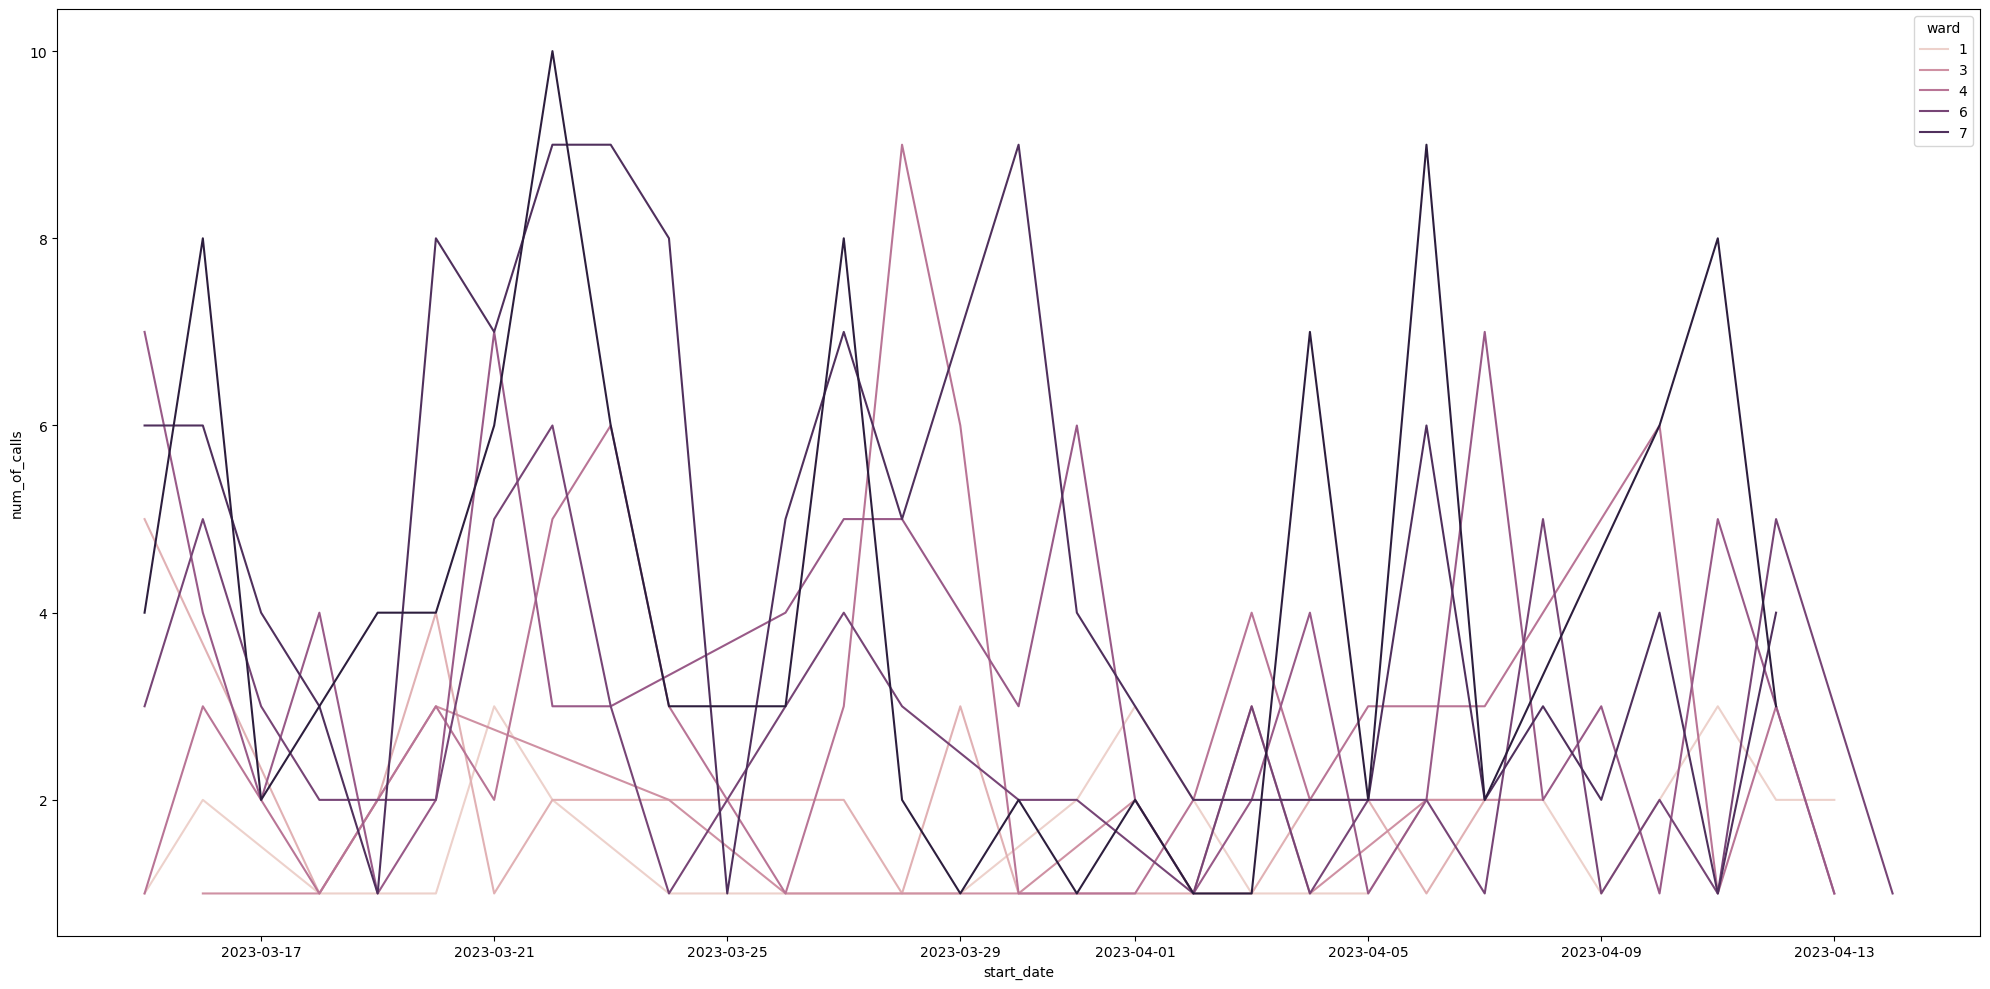

In [181]:
# Visualizing the number of calls per day per ward using a lineplot and subplots for wards. This is to see if there is any relationship between calls and day.

fig, ax = plt.subplots(figsize = (20, 10))
sns.lineplot(ax = ax, data = se, x = 'start_date', y = 'num_of_calls', hue = 'ward')
fig.tight_layout()
plt.show()

Using the line plot above, we can see that there are relationships between wards and the number of service calls regarding abandoned vehicles. A lot of the spikes in the visual occur at the beginning of the week (Mon and Tues) and the drastic dips in the data occur on the weekend. This could be due to the fact that a lot of people commute into DC for work during the week and abandoned vehicles are less of an issue during the weekend.

# GeoJSON

### Reading in the Abandoned Vehicle Data to GeoJSON

Using the geopandas module to read in the geojson files.

In [182]:
# Messing around with abandoned GEOJSON files
# Seems that using gpd.read_file just makes the file into a dataframe and you can still use the pandas function on that 

abandonedGEO = gpd.read_file('Abandoned_Vehicle_in_Last_30_Days.geojson')
abandonedGEO.head()

,OBJECTID,SERVICECODE,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,SERVICECALLCOUNT,ADDDATE,RESOLUTIONDATE,SERVICEDUEDATE,SERVICEORDERDATE,INSPECTIONFLAG,INSPECTIONDATE,INSPECTORNAME,SERVICEORDERSTATUS,STATUS_CODE,SERVICEREQUESTID,PRIORITY,STREETADDRESS,XCOORD,YCOORD,LATITUDE,LONGITUDE,CITY,STATE,ZIPCODE,MARADDRESSREPOSITORYID,WARD,DETAILS,GIS_ID,GLOBALID,CREATOR,CREATED,EDITOR,EDITED,geometry
0,10724521,S0000,Abandoned Vehicle - On Public Property,PEMA- Parking Enforcement Management Administr...,DPW,1,2023-03-15 15:09:40+00:00,2023-03-22 15:39:05+00:00,2023-04-03 15:09:40+00:00,2023-03-15 15:09:40+00:00,NaN,NaN,NaN,Closed,NaN,23-00124770,Standard,Q STREET NW AND KINGMAN PLACE NW,397320.359995,138140.937004,38.911127,-77.030896,WASHINGTON,DC,20009,900493,2,NaN,NaN,{F6F2D87E-391F-7F8A-E053-782F520AED12},NaN,NaN,NaN,NaN,POINT (-77.03090 38.91113)
1,10724551,S0000,Abandoned Vehicle - On Public Property,PEMA- Parking Enforcement Management Administr...,DPW,1,2023-03-15 15:58:39+00:00,2023-04-07 19:15:12+00:00,2023-04-03 15:58:39+00:00,2023-03-15 15:58:39+00:00,NaN,NaN,NaN,Closed,NaN,23-00124938,Standard,1102 STAPLES STREET NE,401219.710000,137039.740000,38.901211,-76.985939,WASHINGTON,DC,20002,74435,5,NaN,NaN,{F6F3796F-ECB0-1362-E053-782F520A4D54},NaN,NaN,NaN,NaN,POINT (-76.98594 38.90122)
2,10724558,S0000,Abandoned Vehicle - On Public Property,PEMA- Parking Enforcement Management Administr...,DPW,1,2023-03-15 16:18:07+00:00,2023-04-12 12:17:47+00:00,2023-04-03 16:18:07+00:00,2023-03-15 16:18:07+00:00,NaN,NaN,NaN,Closed,NaN,23-00125009,Standard,400 9TH STREET NE,400525.880000,136344.250000,38.894946,-76.993938,WASHINGTON,DC,20002,28540,6,NaN,NaN,{F6F3E4BB-06F1-4F2C-E053-782F520A8327},NaN,NaN,NaN,NaN,POINT (-76.99394 38.89495)
3,10724585,S0000,Abandoned Vehicle - On Public Property,PEMA- Parking Enforcement Management Administr...,DPW,1,2023-03-15 17:31:13+00:00,2023-03-21 16:42:06+00:00,2023-04-03 17:31:13+00:00,2023-03-15 17:31:13+00:00,NaN,NaN,NaN,Closed,NaN,23-00125262,Standard,2326 PAYNE TERRACE SE,401002.340000,132777.930000,38.862819,-76.988451,WASHINGTON,DC,20020,48364,8,NaN,NaN,{F6F4F0F4-5CAD-3E5A-E053-782F520AC3E2},NaN,NaN,NaN,NaN,POINT (-76.98845 38.86283)
4,10724657,S0000,Abandoned Vehicle - On Public Property,PEMA- Parking Enforcement Management Administr...,DPW,1,2023-03-15 18:21:48+00:00,NaT,2023-04-03 18:21:48+00:00,2023-03-15 18:21:48+00:00,NaN,NaN,NaN,Open,NaN,23-00125431,Standard,1876 4TH STREET NE,399927.440000,138590.680000,38.915183,-77.000837,WASHINGTON,DC,20002,156294,5,NaN,NaN,{F6F591E2-4463-497B-E053-782F520AA85A},NaN,NaN,NaN,NaN,POINT (-77.00084 38.91519)


Performed the same cleaning as the previous dataframes and plotted them according to ward.

<AxesSubplot: >

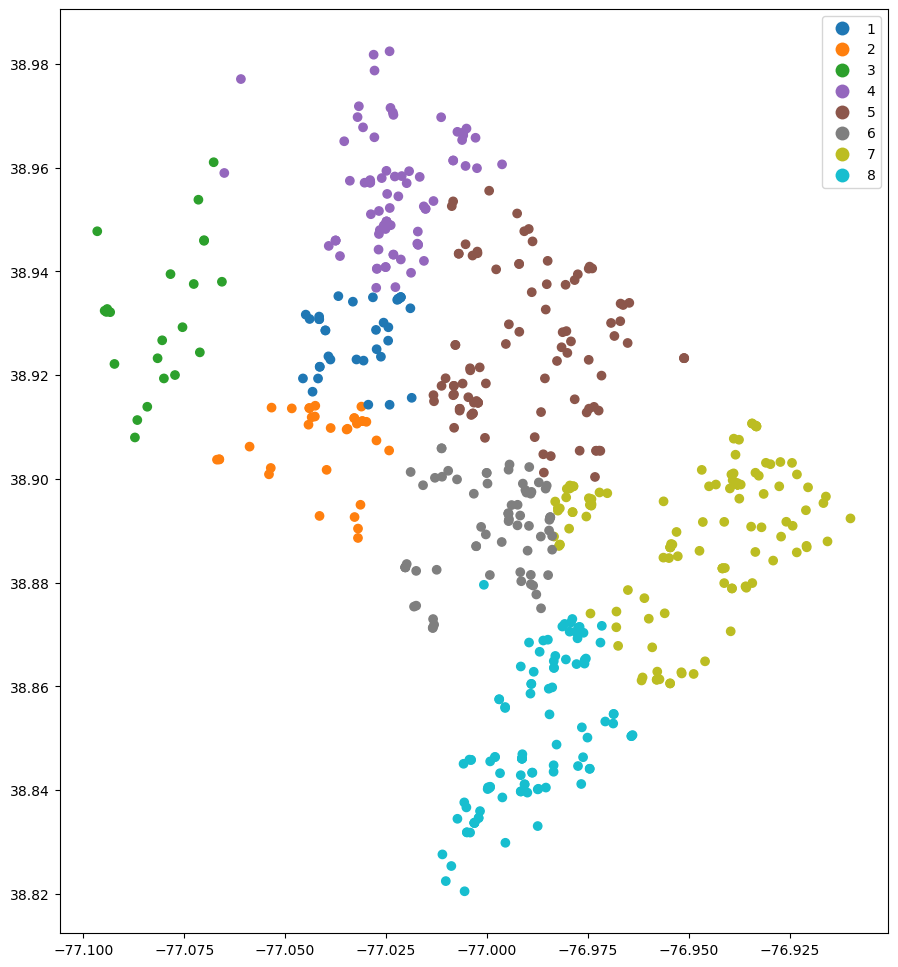

In [183]:
# abandonedGEO['geometry'].info() ====== Data type is geometry 
abandonedGEO = abandonedGEO[['SERVICECODE', 'SERVICECODEDESCRIPTION', 'ADDDATE', 'RESOLUTIONDATE',
                             'SERVICEDUEDATE', 'SERVICEORDERDATE', 'PRIORITY', 'STREETADDRESS', 'LATITUDE', 'LONGITUDE', 'ZIPCODE', 'WARD', 'geometry']] #cleaned it according to the similar pandas before
abandonedGEO.head()
abandonedGEO = abandonedGEO.dropna()
abandonedGEO = abandonedGEO[abandonedGEO.WARD != 'Null']
abandonedGEO.plot(column = 'WARD', legend = True, figsize = (20,12))

We found the above visualization using GeoJSON to be interesting because we can notice that there is a significant cluster of service calls about abandoned vehicles in ward 8, right along the border with ward 6 and 7. We also noticed that there are multiple little clusters in ward 4 and a cluster in ward 3. This could be due to the fact that there are multiple service calls from the same area regarding the same vehicle but from different people, or that they cluster because of the repeat offenders as addressed early in the project.

# Creating an Interactive Map With GeoJSON and Abandoned_df Data

In [184]:
# Have to install proper modules which are: 
#   pip install folium matplotlib mapclassify geodatasets

abandMap = folium.Map(location = [38.9, -77.05], zoom_start = 12)

locations = abandonedGEO[['LATITUDE', 'LONGITUDE']]
locationlist = locations.values.tolist()

for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point]).add_to(abandMap)

abandMap

The interactive map created using GeoJSON shows where all of the abandoned vehicle service calls have occurred in DC over the course of 30 days. There are significant gaps between the service calls and we found the fact that ward 3 has extremely scattered service calls and such few requests even though it shares a similar population and size with the other wards. This could be due to the fact that it is a more rural area bordering Bethesda, MD. We also found that some of the large gaps in data points is due to geographical landmarks (such as the Potomac, Rock Creek Park, and the US National Arboretum).

### Reading in the Parking Vioaltion Data to GeoJSON

In [185]:
parkingGEO = gpd.read_file('Parking_Enforcement_in_the_Last_30_Days.geojson')
parkingGEO.head()

,OBJECTID,SERVICECODE,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,SERVICECALLCOUNT,ADDDATE,RESOLUTIONDATE,SERVICEDUEDATE,SERVICEORDERDATE,INSPECTIONFLAG,INSPECTIONDATE,INSPECTORNAME,SERVICEORDERSTATUS,STATUS_CODE,SERVICEREQUESTID,PRIORITY,STREETADDRESS,XCOORD,YCOORD,LATITUDE,LONGITUDE,CITY,STATE,ZIPCODE,MARADDRESSREPOSITORYID,WARD,DETAILS,GIS_ID,GLOBALID,CREATOR,CREATED,EDITOR,EDITED,geometry
0,10724421,S0336,Out of State Parking Violation (ROSA),PEMA- Parking Enforcement Management Administr...,DPW,1,2023-03-15 04:34:29+00:00,2023-03-15 07:46:56+00:00,2023-04-26 04:34:29+00:00,2023-03-15 04:34:29+00:00,NaN,NaN,NaN,Closed,NaN,23-00124003,Standard,7500 EASTERN AVENUE NW,397968.08,145990.78,38.981843,-77.023451,WASHINGTON,DC,20012.0,251131,4,NaN,NaN,{F6EA0B7F-2B37-77F1-E053-782F520A3108},NaN,NaN,NaN,NaN,POINT (-77.02345 38.98185)
1,10724422,S0261,Parking Enforcement,PEMA- Parking Enforcement Management Administr...,DPW,1,2023-03-15 04:39:45+00:00,2023-03-15 08:37:17+00:00,2023-03-16 04:39:45+00:00,2023-03-15 04:39:45+00:00,NaN,NaN,NaN,Closed,NaN,23-00124004,Standard,2323 SHERMAN AVENUE NW,397837.85,139245.25,38.921076,-77.024933,WASHINGTON,DC,20001.0,232313,1,NaN,NaN,{F6EA0B7F-2B38-77F1-E053-782F520A3108},NaN,NaN,NaN,NaN,POINT (-77.02494 38.92108)
2,10724423,S0336,Out of State Parking Violation (ROSA),PEMA- Parking Enforcement Management Administr...,DPW,1,2023-03-15 05:03:54+00:00,2023-03-15 07:10:37+00:00,2023-04-27 05:03:54+00:00,2023-03-15 05:03:54+00:00,NaN,NaN,NaN,Closed,NaN,23-00124007,Standard,30 17TH STREET SE,401690.03,135685.93,38.889014,-76.980520,WASHINGTON,DC,20003.0,155403,7,NaN,NaN,{F6EA76D6-0841-1BC3-E053-782F520A3E86},NaN,NaN,NaN,NaN,POINT (-76.98052 38.88902)
3,10724429,S0261,Parking Enforcement,PEMA- Parking Enforcement Management Administr...,DPW,1,2023-03-15 10:59:06+00:00,2023-03-15 16:04:07+00:00,2023-03-16 10:59:06+00:00,2023-03-15 10:59:06+00:00,NaN,NaN,NaN,Closed,NaN,23-00124040,Standard,1606 K STREET NE,401650.12,137207.91,38.902725,-76.980976,WASHINGTON,DC,20002.0,60120,5,NaN,NaN,{F6EF7E33-55EB-7477-E053-782F520AA985},NaN,NaN,NaN,NaN,POINT (-76.98098 38.90273)
4,10724431,S0261,Parking Enforcement,PEMA- Parking Enforcement Management Administr...,DPW,1,2023-03-15 11:07:59+00:00,2023-03-15 12:55:44+00:00,2023-03-16 11:07:59+00:00,2023-03-15 11:07:59+00:00,NaN,NaN,NaN,Closed,NaN,23-00124043,Standard,1531 41ST STREET SE,404862.21,133300.13,38.867510,-76.943973,WASHINGTON,DC,20020.0,61047,7,NaN,NaN,{F6EF7E33-55ED-7477-E053-782F520AA985},NaN,NaN,NaN,NaN,POINT (-76.94398 38.86752)


Performed the same cleaning as the previous dataframes and plotted them according to ward.

<AxesSubplot: >

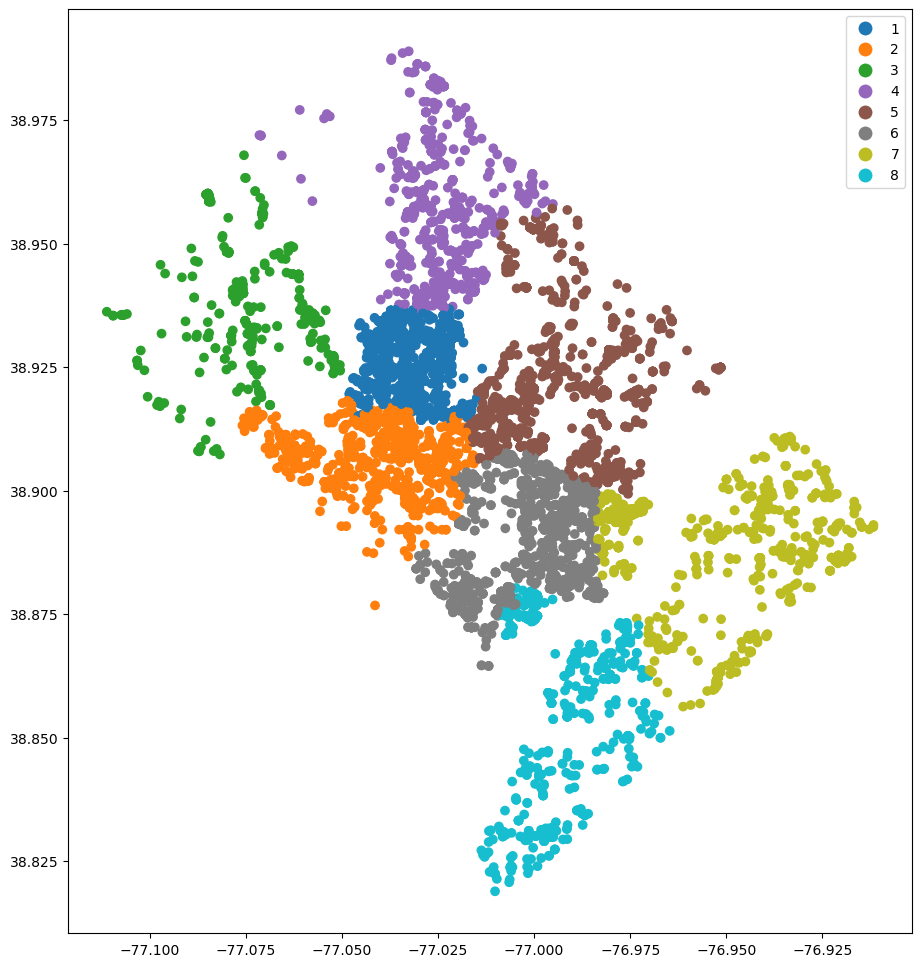

In [186]:
parkingGEO = parkingGEO[['SERVICECODE', 'SERVICECODEDESCRIPTION', 'ADDDATE', 'RESOLUTIONDATE',
                             'SERVICEDUEDATE', 'SERVICEORDERDATE', 'PRIORITY', 'STREETADDRESS', 'LATITUDE', 'LONGITUDE', 'ZIPCODE', 'WARD', 'geometry']] #cleaned it according to the similar pandas before
parkingGEO.head()
parkingdGEO = parkingGEO.dropna()
parkingGEO = parkingGEO[parkingGEO.WARD != 'Null']
parkingGEO.plot(column = 'WARD', legend = True, figsize = (20,12))

# Creating an Interactive Map With GeoJSON and Parking Enforcement Data

#### Notes: 

*Tried to do the same as the interactive map with the abandoned car geoJSON data, but because of the amount of different map markers, it takes a lot of processing power and it just seems like so many overlapping points that it might not be worth it. Could be useful if we use some filters later on.*

In [187]:
# Have to install proper modules which are: 
#   pip install folium matplotlib mapclassify geodatasets


#parkingMap = folium.Map(location = [38.9, -77.05], zoom_start = 12)

#locations = parkingGEO[['LATITUDE', 'LONGITUDE']]
#locationlist = locations.values.tolist()

#for point in range(0, len(locationlist)):
    #folium.Marker(locationlist[point]).add_to(parkingMap)

#parkingMap

## *Discussion*

Our initial goal of this analysis was to look at both parking violations and abandoned vehicles in various wards of Washington DC. data to see in which area the police enforcement were concentrated, in which area had the most abandoned vehicles reported, and the correlation between locations with parking and abandoned vehicles. 

After doing some analysis, we couldn't see any correlation between locations with parking and abandoned vehicles but we were able to take out the result of there are a couple similarities with service calls per ward for parking violations. It was interesting to see that out of 15 areas where most of the parking violations has been reported, 2 areas which had a result of having the most out-of-state parking violations was near the metro bus stations. Also, we have found that most of the abondoned vehicles reported were concentrated on the beginning of the weekdays including Monday and Tuesday which was a result of commuters who work in DC during the weekdays. 

Overall, we couldn't answer all of our research questions but did made some interesting results such as different populations of parking violations in each wards or mapping out the population of abandoned vehicles near geographical landmarks. 



## *Limitations*

Some limitations of this data set is that this might not be a representative sample of the wards throughout the year, only a 30 day period out of 365 days. While this might shed some light, it's just a small glimpse and might not be indictiative of how it is throughout the year. Another limitation of this data set is that we did not have more information of the wards themselves (household income, crime rates, etc.). With that data, we could see if different area attributes affected the rate of service calls/parking violations or not. There could have also been other bits of information about the vehicles/violations that could have contributed to further analyses like the time a car was abandoned, model, make, etc. 

Another limitation is that even though this was a small data set relative to what it could be throughout the year, just by making an interactive map with the parking enforcement GEOJSON data caused our computers to come to a halt and make the program nonresponsive for a little bit. The larger data could need a beefier system to process faster or it could be due to how it was coded since it was new material to us and we did it inefficiently. 

## *Conclusion*

Our work found many impactful results. Although there is no correlation between the number of violations and abandoned vehicles by ward, we did find there are many repeat offenders for abandoned vehicles. Furthermore, we also found that locations with higher out of state ticketing, tend to be closer to metro bus stops and the Maryland state line. Lastly, the number of violations for abandoned vehicles tends to spike earlier in the week, we believe this could be attributed to the large number of commuters that work in DC.



### *References*

Abandoned vehicle in last 30 days. Open Data DC. (n.d.). Retrieved May 7, 2023, from https://opendata.dc.gov/datasets/abandoned-vehicle-in-last-30-days/explore?location=38.894712%2C-77.019147%2C12.90&showTable=true 

Parking enforcement in the last 30 days. Open Data DC. (n.d.). Retrieved May 7, 2023, from https://opendata.dc.gov/datasets/DCGIS::parking-enforcement-in-the-last-30-days/explore?location=38.894734%2C-77.019147%2C13.00&showTable=true 